## 💥1. Introduction

This report analyzes the World Happiness dataset. We will explore the overall distribution of happiness scores, identify the 10 happiest and least happy countries and examine correlations with other factors with visualization.

## 📂2. Loading the Dataset

Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the CSV file into a DataFrame & Check the raw dataset

In [4]:
df = pd.read_csv(r"C:\World Happiness Dataset\World_Happiness_Dataset (2019).csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 🔍3. Overview of the data

Check the structure, data types, statistics and any missing values

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [6]:
df.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## 🧹4. Cleaning the data

Standardize column names, clean string columns, convert numeric columns, remove duplicates and handle missing values

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.title()

numeric_cols = ['score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
                'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.drop_duplicates()

df = df.dropna(subset=['score', 'gdp_per_capita'])

## 📊5. Exploratory Data Analysis with Visualization

Distribution of Happiness Scores

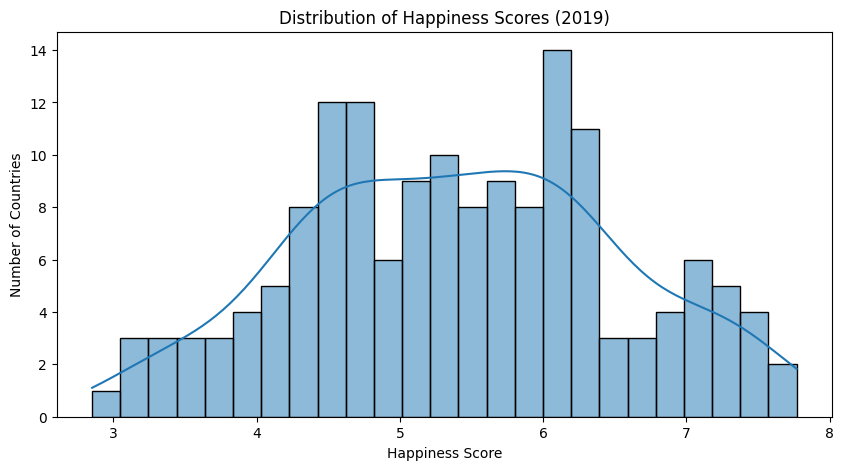

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df['score'], bins=25, kde=True)
plt.title("Distribution of Happiness Scores (2019)")
plt.xlabel("Happiness Score")
plt.ylabel("Number of Countries")
plt.show()

Top 10 happiest countries

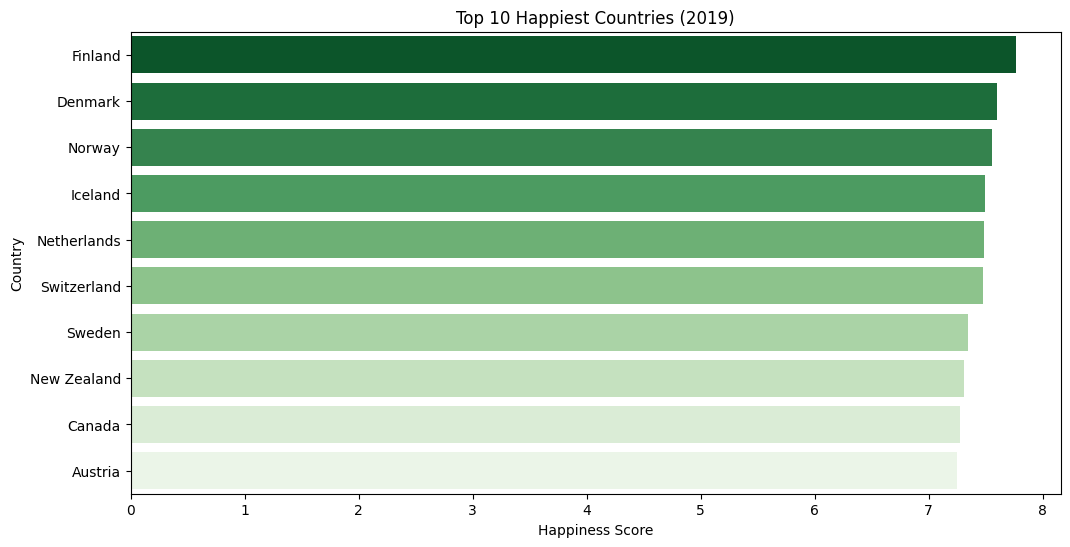

In [9]:
top10 = df[['country_or_region', 'score']].sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='score', y='country_or_region', data=top10, palette='Greens_r', hue= 'country_or_region')
plt.title("Top 10 Happiest Countries (2019)")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

Bottom 10 least happy countries

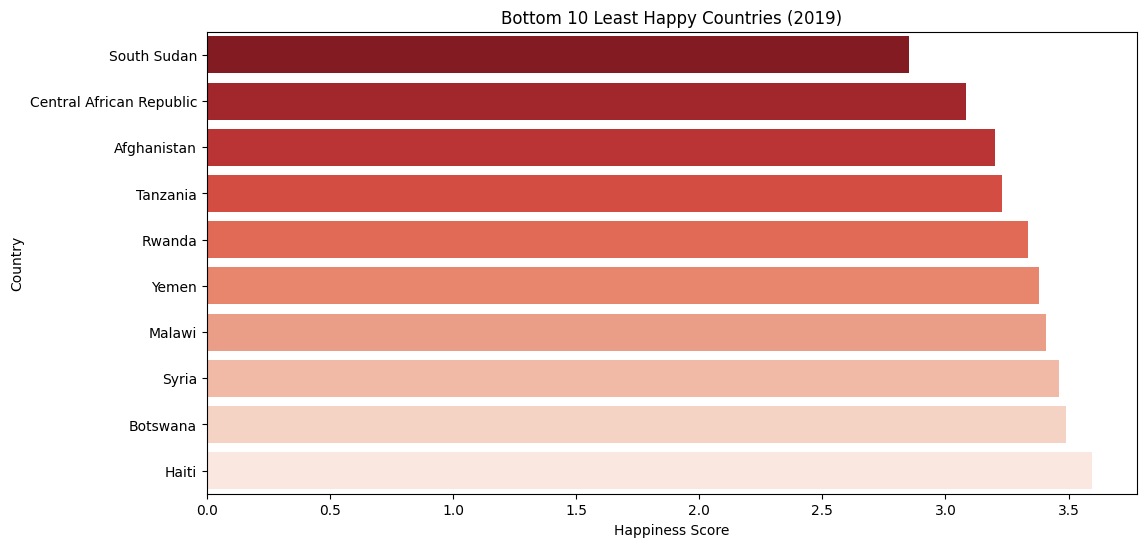

In [10]:
bottom10 = df[['country_or_region', 'score']].sort_values(by='score', ascending= True).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='score', y='country_or_region', data=bottom10, palette='Reds_r', hue= 'country_or_region')
plt.title("Bottom 10 Least Happy Countries (2019)")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

Happiness Score vs GDP per Capita (10 Countries)

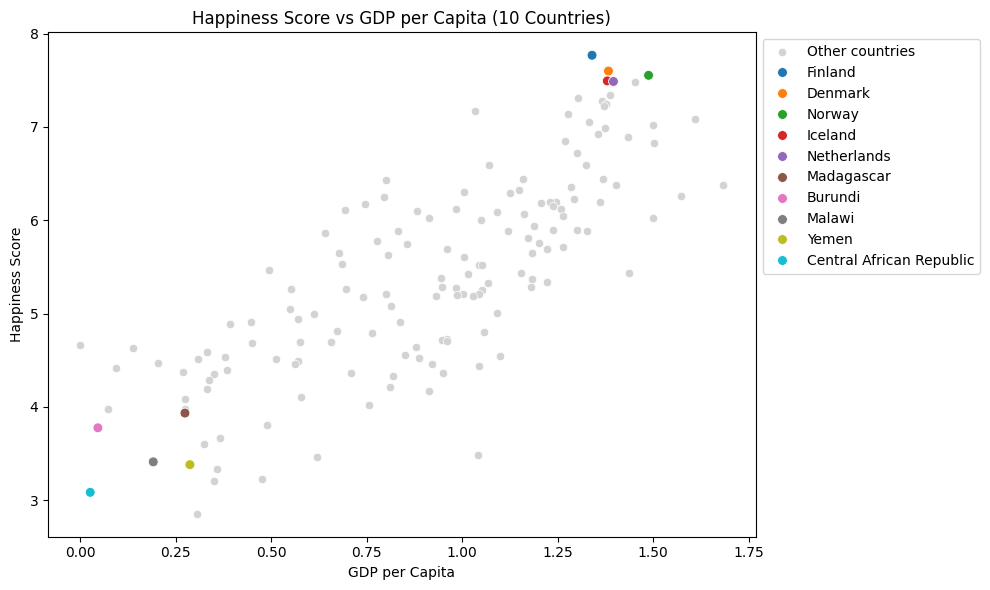

In [11]:
top_right = df[(df['score'] > 7) & (df['gdp_per_capita'] > 1.3)]

top_happy = top_right.sort_values(by="score", ascending=False).head(5)["country_or_region"]

bottom_left = df[(df['score'] < 4) & (df['gdp_per_capita'] < 0.3)]

least_happy = bottom_left.sort_values(by="score", ascending=True).head(5)["country_or_region"]

# Combine both lists
combined_countries = pd.concat([top_happy, least_happy])

# Filter the dataframe
df_subset = df[df["country_or_region"].isin(combined_countries)]

# Plot all countries
plt.figure(figsize=(10,6))
sns.scatterplot(x='gdp_per_capita', y='score', data=df, color='lightgray', label='Other countries')
sns.scatterplot(
    data=df_subset,
    x="gdp_per_capita",
    y="score",
    hue="country_or_region",
    palette="tab10",
    s=50
)
plt.title("Happiness Score vs GDP per Capita (10 Countries)")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

Happiness Score vs Healthy Life Expectancy (10 Countries)

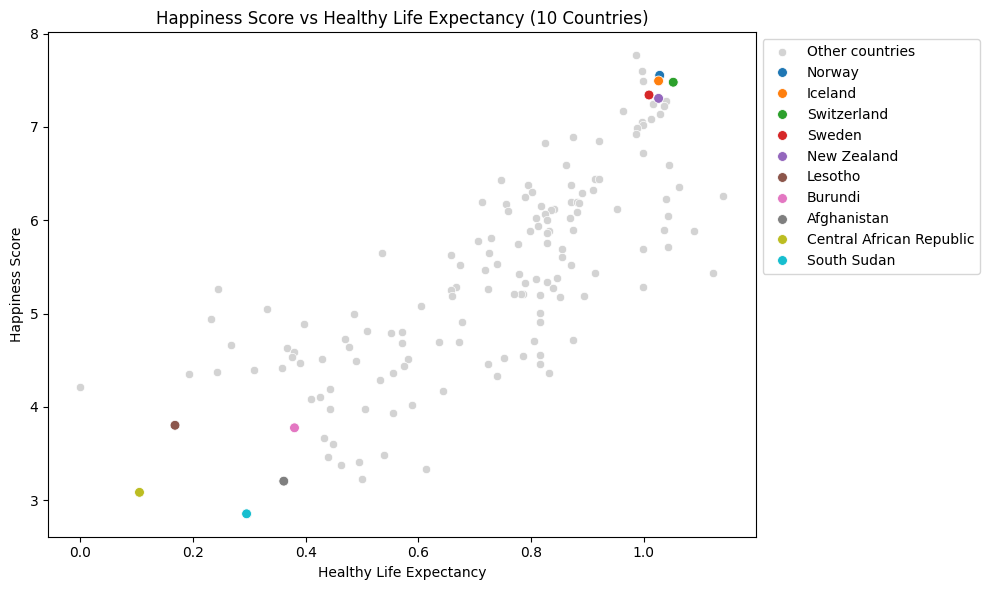

In [12]:
top_right = df[(df['score'] > 7) & (df['healthy_life_expectancy'] > 1)]

top_happy = top_right.sort_values(by="score", ascending=False).head(5)["country_or_region"]

bottom_left = df[(df['score'] < 4) & (df['healthy_life_expectancy'] < 0.4)]

least_happy = bottom_left.sort_values(by="score", ascending=True).head(5)["country_or_region"]

# Combine both lists
combined_countries = pd.concat([top_happy, least_happy])

# Filter the dataframe
df_subset = df[df["country_or_region"].isin(combined_countries)]

# Plot all countries
plt.figure(figsize=(10,6))
sns.scatterplot(x='healthy_life_expectancy', y='score', data=df, color='lightgray', label='Other countries')
sns.scatterplot(
    data=df_subset,
    x="healthy_life_expectancy",
    y="score",
    hue="country_or_region",
    palette="tab10",
    s=50
)
plt.title("Happiness Score vs Healthy Life Expectancy (10 Countries)")
plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

Happiness Score vs Social Support (10 Countries)

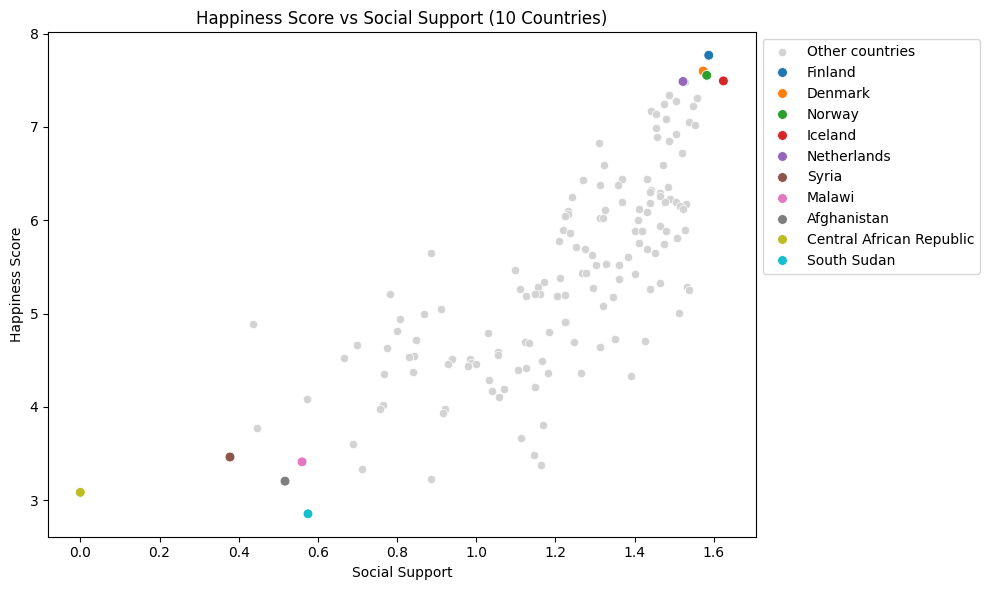

In [13]:
top_right = df[(df['score'] > 7) & (df['social_support'] > 1.4)]

top_happy = top_right.sort_values(by="score", ascending=False).head(5)["country_or_region"]

bottom_left = df[(df['score'] < 4) & (df['social_support'] < 0.6)]

least_happy = bottom_left.sort_values(by="score", ascending=True).head(5)["country_or_region"]

# Combine both lists
combined_countries = pd.concat([top_happy, least_happy])

# Filter the dataframe
df_subset = df[df["country_or_region"].isin(combined_countries)]

# Plot all countries
plt.figure(figsize=(10,6))
sns.scatterplot(x='social_support', y='score', data=df, color='lightgray', label='Other countries')
sns.scatterplot(
    data=df_subset,
    x="social_support",
    y="score",
    hue="country_or_region",
    palette="tab10",
    s=50
)
plt.title("Happiness Score vs Social Support (10 Countries)")
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

Correlation heatmap of key indicators

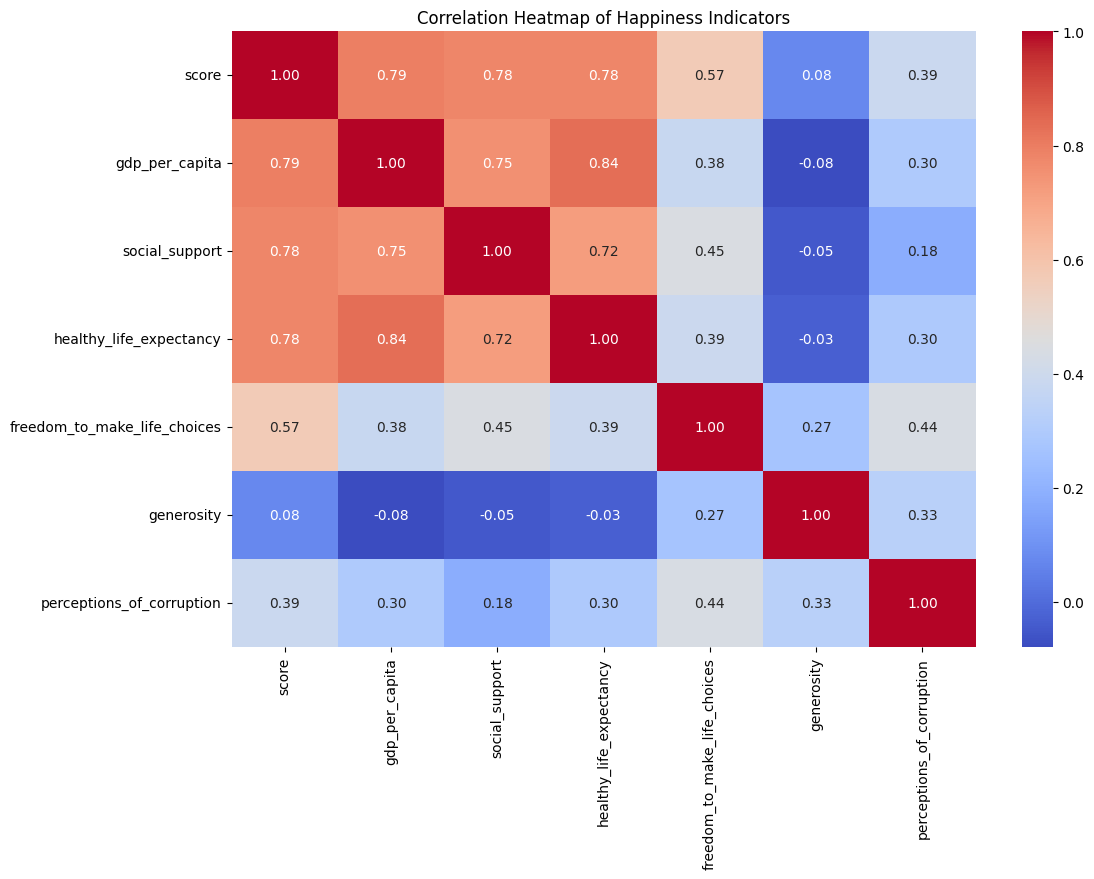

In [14]:
plt.figure(figsize=(12,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Happiness Indicators")
plt.show()

## 📌6. Conclusion

* Happiness Distribution: Most countries have happiness scores clustered around the middle range, with a few extreme cases at both ends.
* Top vs Bottom Countries: The top happiest countries consistently show high GDP per capita, life expectancy, and social support, while the least happy countries have low values in these indicators.
* GDP per Capita & Happiness: There is a noticeable correlation, but some countries deviate from the trend, indicating that high GDP alone does not guarantee higher happiness.
* Other Key Indicators: Healthy life expectancy and social support are strongly linked with higher happiness scores, highlighting the importance of well-being beyond economic wealth.
* Correlation Insights: The heatmap confirms that economic, social, and health factors interact to influence overall happiness, with several meaningful correlations among indicators.

💬 Personal Review: This analysis emphasizes that happiness is determined by a single factor and cannot be explained solely by GDP. Examining health and social support provides deeper understanding of the conditions contributing to well-being. Overall, the project enhanced my insight into how different factors collectively shape happiness across countries and highlighted the extremes at both ends of the spectrum.